In [526]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc,ConfusionMatrixDisplay, RocCurveDisplay
)

def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

data = pd.read_csv("dummy_allgrades_data.csv")
#data = pd.read_csv("dummy_grade_data.csv")
#data = pd.read_csv("dummy_subgrade_data.csv")
#data = pd.read_csv("data_nograde.csv")

X = data.drop(["Loan Status"], axis=1)
X = StandardScaler().fit_transform(X)
y = data["Loan Status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)



# Logistic Regression without oversampling

In [527]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import (
    accuracy_score
)

In [528]:
LR_Model_orig = LogisticRegression(random_state=0).fit(X_train, y_train)

y_test_pred= LR_Model_orig.predict(X_test)

print_score(y_test, y_test_pred, train=False)


Test Result:
Accuracy Score: 91.71%
_______________________________________________
CLASSIFICATION REPORT:
                     0      1  accuracy    macro avg  weighted avg
precision     0.917148    0.0  0.917148     0.458574      0.841161
recall        1.000000    0.0  0.917148     0.500000      0.917148
f1-score      0.956784    0.0  0.917148     0.478392      0.877513
support    4284.000000  387.0  0.917148  4671.000000   4671.000000
_______________________________________________
Confusion Matrix: 
 [[4284    0]
 [ 387    0]]



/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


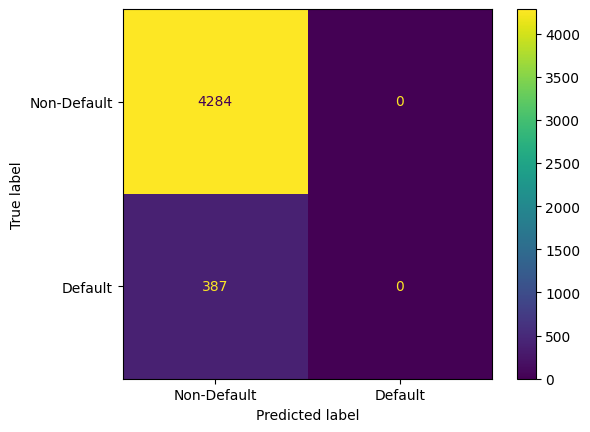

In [529]:
cm=confusion_matrix(y_test,y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Non-Default', 'Default'])

disp.plot()

# Add Oversampling

In [530]:
X_train, y_train = SMOTE().fit_resample(X_train, y_train)
#X_test, y_test = SMOTE(random_state=10).fit_resample(X_test, y_test)


# Logistic Regression

In [531]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
LR_Model = LogisticRegression(random_state=0).fit(X_train, y_train)

y_test_pred= LR_Model.predict(X_test)
# y_pred_u= LR_Model.predict(X_test_u)

# Accuracy Score
accuracy = accuracy_score(y_test,y_test_pred)
# accuracy_u = accuracy_score(y_test_u,y_pred_u)
print ("Accuracy Score:", accuracy)
# print ("Accuracy Score for new input:", accuracy)
print("Percentage of ones in y_pred",sum(y_test_pred)/len(y_test_pred))
print("Percentage of ones in y_test",sum(y_test)/len(y_test))


print_score(y_test, y_test_pred, train=False)


Accuracy Score: 0.5230143438235924
Percentage of ones in y_pred 0.47848426461143223
Percentage of ones in y_test 0.08285163776493257
Test Result:
Accuracy Score: 52.30%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.922003    0.088143  0.523014     0.505073      0.852917
recall        0.524276    0.509044  0.523014     0.516660      0.523014
f1-score      0.668452    0.150267  0.523014     0.409360      0.625520
support    4284.000000  387.000000  0.523014  4671.000000   4671.000000
_______________________________________________
Confusion Matrix: 
 [[2246 2038]
 [ 190  197]]



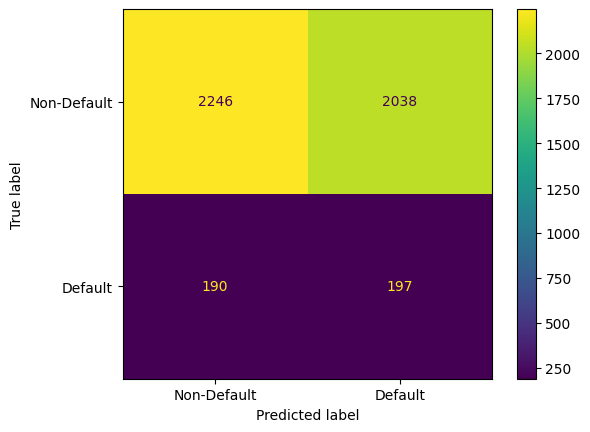

In [532]:
cm=confusion_matrix(y_test,y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Non-Default', 'Default'])

disp.plot()

# Random Forest

In [533]:
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras as ks
from keras import Sequential, Model




In [534]:
rf_clf = RandomForestClassifier(n_estimators=10)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)


print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 99.60%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.992078     1.000000  0.996007      0.996039      0.996039
recall        1.000000     0.992015  0.996007      0.996007      0.996007
f1-score      0.996023     0.995991  0.996007      0.996007      0.996007
support    9893.000000  9893.000000  0.996007  19786.000000  19786.000000
_______________________________________________
Confusion Matrix: 
 [[9893    0]
 [  79 9814]]

Test Result:
Accuracy Score: 91.48%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.917670    0.210526  0.914793     0.564098      0.859082
recall        0.996499    0.010336  0.914793     0.503417      0.914793
f1-score      0.955461    0.019704  0.914793     0.487583      0.877932
support    4284.000000  387.000

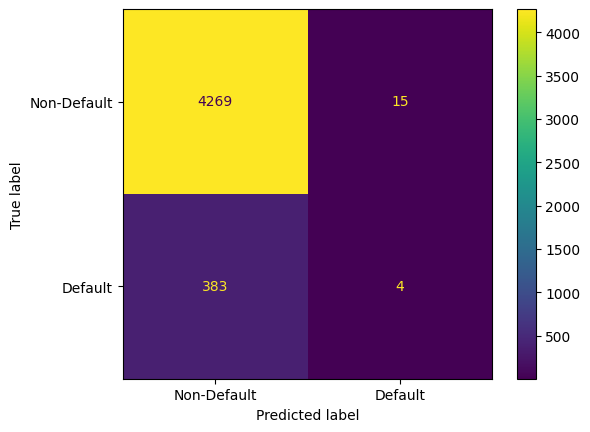

In [535]:
cm=confusion_matrix(y_test,y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Non-Default', 'Default'])

disp.plot()

# ROC for Random Forest

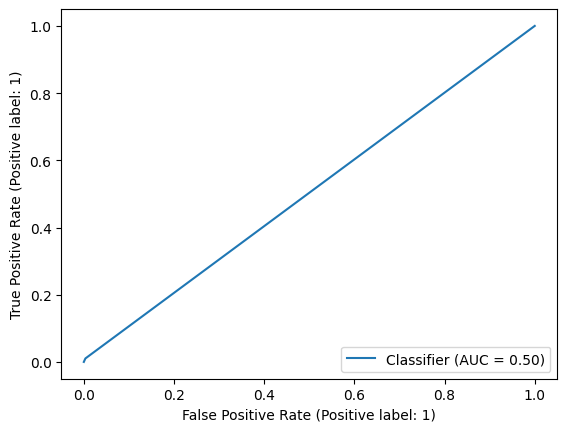

In [536]:
RocCurveDisplay.from_predictions(y_test, y_test_pred)
plt.show()

# Use XGBooster Classifier

In [537]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()

In [538]:
xgb_clf.fit(X_train, y_train)
y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)
#y_test_pred_u = xgb_clf.predict(X_test_u)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)
#print_score(y_test_u, y_test_pred_u, train=False)

Train Result:
Accuracy Score: 98.25%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.966208     1.000000  0.982513      0.983104      0.983104
recall        1.000000     0.965026  0.982513      0.982513      0.982513
f1-score      0.982813     0.982202  0.982513      0.982508      0.982508
support    9893.000000  9893.000000  0.982513  19786.000000  19786.000000
_______________________________________________
Confusion Matrix: 
 [[9893    0]
 [ 346 9547]]

Test Result:
Accuracy Score: 91.56%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.917382    0.181818   0.91565     0.549600      0.856439
recall        0.997899    0.005168   0.91565     0.501534      0.915650
f1-score      0.955948    0.010050   0.91565     0.482999      0.877579
support    4284.000000  387.000

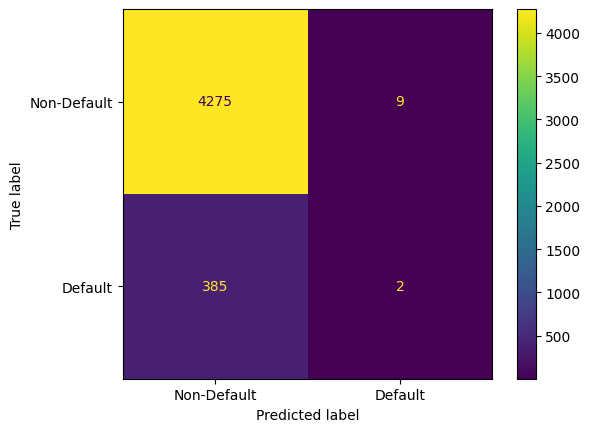

In [539]:
cm=confusion_matrix(y_test,y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Non-Default', 'Default'])

disp.plot()

# ROC for XGBooster

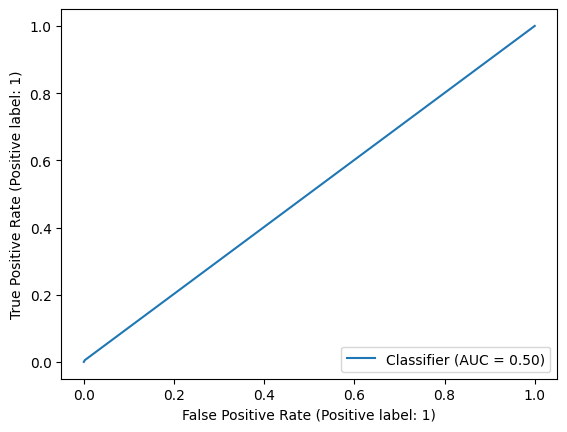

In [540]:
RocCurveDisplay.from_predictions(y_test, y_test_pred)
plt.show()

# ANN

In [541]:
import tensorflow as tf
from tensorflow import keras as ks
from keras import Sequential, Model
from keras.layers import Dense, Dropout, BatchNormalization 
from keras.optimizers import Adam
from keras.metrics import AUC

import matplotlib.pyplot as plt

In [542]:
def evaluate_nn(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
def plot_learning_evolution(r):
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='Loss')
    plt.plot(r.history['val_loss'], label='val_Loss')
    plt.title('Loss evolution during trainig')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(r.history['AUC'], label='AUC')
    plt.plot(r.history['val_AUC'], label='val_AUC')
    plt.title('AUC score evolution during trainig')
    plt.legend()

def nn_model(num_columns, num_labels, hidden_units, dropout_rates, learning_rate):
    inp = tf.keras.layers.Input(shape=(num_columns, ))
    x = BatchNormalization()(inp)
    x = Dropout(dropout_rates[0])(x)
    for i in range(len(hidden_units)):
        x = Dense(hidden_units[i], activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(dropout_rates[i + 1])(x)
    x = Dense(num_labels, activation='sigmoid')(x)
  
    model = Model(inputs=inp, outputs=x)
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=[AUC(name='AUC')])
    return model

In [543]:
num_columns = X_train.shape[1]
num_labels = 1
hidden_units = [150, 150, 150]
dropout_rates = [0.1, 0, 0.1, 0]
learning_rate = 1e-3


model = nn_model(
    num_columns=num_columns, 
    num_labels=num_labels,
    hidden_units=hidden_units,
    dropout_rates=dropout_rates,
    learning_rate=learning_rate
)
r = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)

Epoch 1/20
619/619 [==============================] - 2s 2ms/step - loss: 0.6213 - AUC: 0.7200 - val_loss: 0.5423 - val_AUC: 0.5037
Epoch 2/20
619/619 [==============================] - 1s 2ms/step - loss: 0.4937 - AUC: 0.8409 - val_loss: 0.5806 - val_AUC: 0.4968
Epoch 3/20
619/619 [==============================] - 1s 2ms/step - loss: 0.4388 - AUC: 0.8776 - val_loss: 0.5625 - val_AUC: 0.5089
Epoch 4/20
619/619 [==============================] - 1s 2ms/step - loss: 0.4007 - AUC: 0.8995 - val_loss: 0.5550 - val_AUC: 0.5189
Epoch 5/20
619/619 [==============================] - 1s 2ms/step - loss: 0.3666 - AUC: 0.9170 - val_loss: 0.5326 - val_AUC: 0.5071
Epoch 6/20
619/619 [==============================] - 1s 2ms/step - loss: 0.3500 - AUC: 0.9244 - val_loss: 0.5325 - val_AUC: 0.5178
Epoch 7/20
619/619 [==============================] - 1s 2ms/step - loss: 0.3323 - AUC: 0.9323 - val_loss: 0.5583 - val_AUC: 0.4912
Epoch 8/20
619/619 [==============================] - 1s 2ms/step - loss: 0.

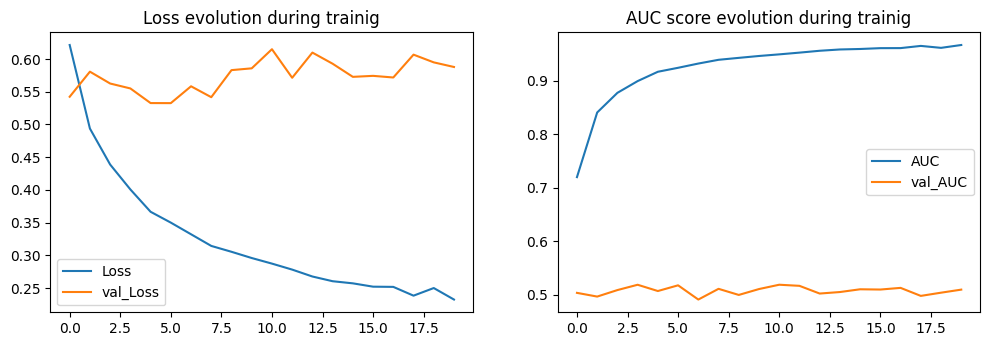

In [544]:
plot_learning_evolution(r)

In [545]:
y_train_pred = model.predict(X_train)
evaluate_nn(y_train, y_train_pred.round(), train=True)

619/619 [==============================] - 1s 1ms/step
Train Result:
Accuracy Score: 96.77%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.966902     0.968510  0.967704      0.967706      0.967706
recall        0.968564     0.966845  0.967704      0.967704      0.967704
f1-score      0.967732     0.967677  0.967704      0.967704      0.967704
support    9893.000000  9893.000000  0.967704  19786.000000  19786.000000
_______________________________________________
Confusion Matrix: 
 [[9582  311]
 [ 328 9565]]



In [546]:
y_test_pred = model.predict(X_test)
evaluate_nn(y_test, y_test_pred.round(), train=False)

146/146 [==============================] - 0s 642us/step
Test Result:
Accuracy Score: 83.02%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.918485    0.094000  0.830229     0.506242      0.850175
recall        0.894258    0.121447  0.830229     0.507852      0.830229
f1-score      0.906209    0.105975  0.830229     0.506092      0.839909
support    4284.000000  387.000000  0.830229  4671.000000   4671.000000
_______________________________________________
Confusion Matrix: 
 [[3831  453]
 [ 340   47]]



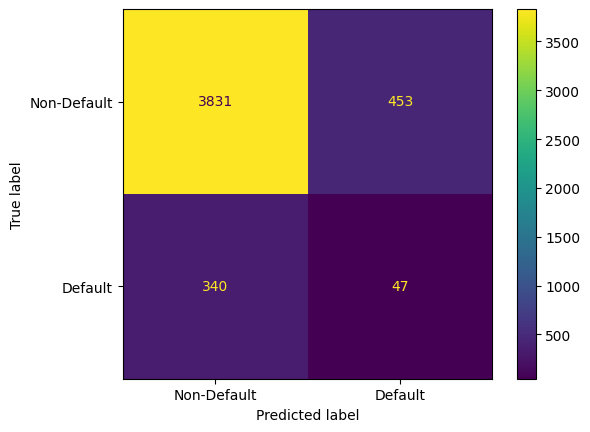

In [547]:
cm=confusion_matrix(y_test,y_test_pred.round())
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Non-Default', 'Default'])

disp.plot()

# ROC for ANN

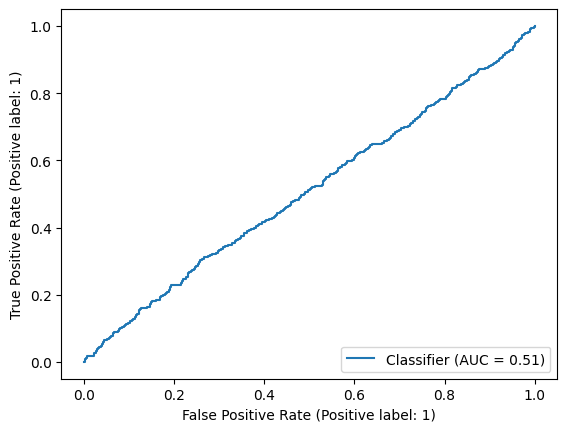

In [548]:
RocCurveDisplay.from_predictions(y_test, y_test_pred)
plt.show()